In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

In [2]:
df_01 = pd.read_excel('all_with_correction.xlsx', sheet_name='01')

In [3]:
df_02 = pd.read_excel('all_with_correction.xlsx', sheet_name='02')

In [4]:
df_04 = pd.read_excel('all_with_correction.xlsx', sheet_name='04')

In [5]:
df_05 = pd.read_excel('all_with_correction.xlsx', sheet_name='05')

In [6]:
def mapping(x, a, b, c):
    return a * x**2 + b * x + c

In [7]:
def approx(df, mapping):
    args, _ = curve_fit(mapping, df['tempINT'], df['TENZO_inv']) 
    a, b, c = args[0], args[1], args[2] 
    y_fit = a * df['tempINT']**2 + b * df['tempINT'] + c 
    plt.plot(df['tempINT'], df['TENZO_inv'], '-', label="y - original") 
    plt.plot(df['tempINT'], y_fit, label="y = a * x^2 + b * x + c", color='r') 
    plt.xlabel('x') 
    plt.ylabel('y') 
    plt.legend(loc = 'best', fancybox = True, shadow = True) 
    plt.grid(True) 
    plt.show() 

    return args

In [8]:
frame = []

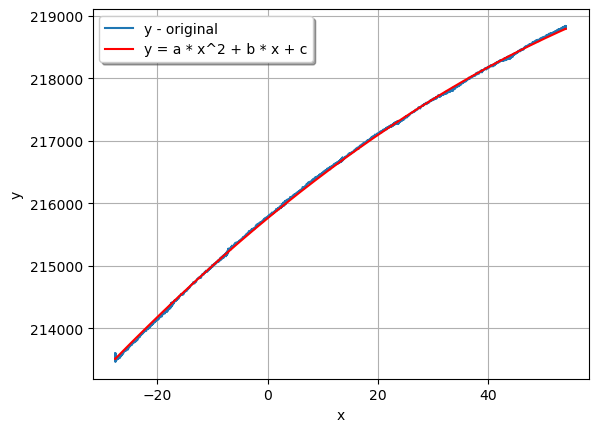

In [9]:
args_01 = approx(df_01, mapping)

In [10]:
frame.append(args_01)

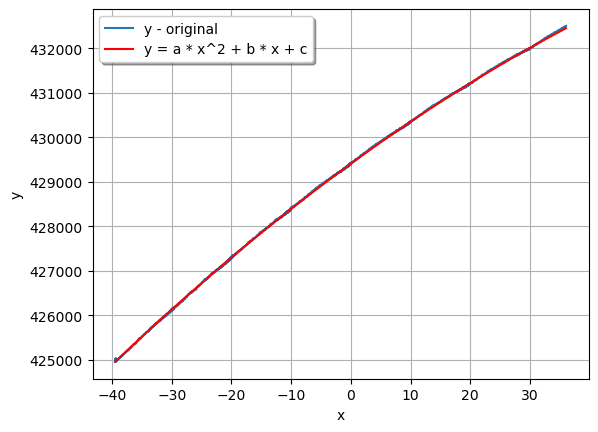

In [11]:
args_02 = approx(df_02, mapping)

In [12]:
frame.append(args_02)

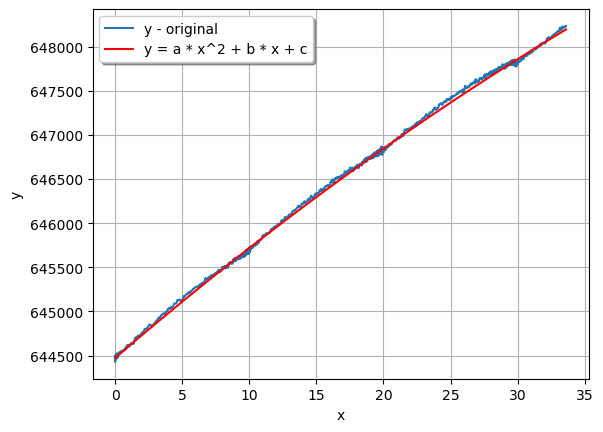

In [13]:
args_04 = approx(df_04, mapping)

In [14]:
frame.append(args_04)

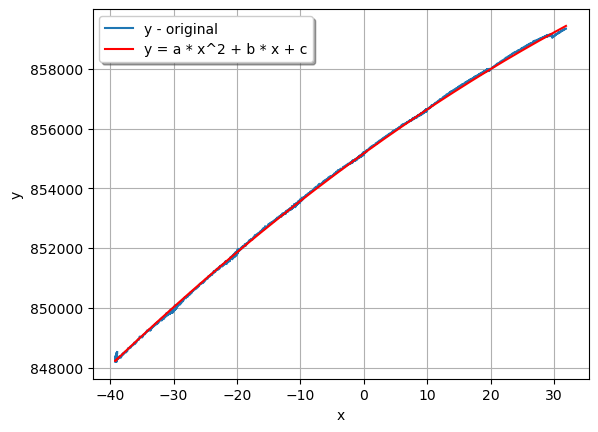

In [15]:
args_05 = approx(df_05, mapping)

In [16]:
frame.append(args_05)

In [17]:
frame.append([-5.78759575, 191.196243, 206641.984])

In [18]:
koeff = pd.DataFrame(data=frame, columns=['k', 'd', 'L'])

In [19]:
koeff

,k,d,L
0,-0.309307,72.785245,215760.830563
1,-0.374257,97.957507,429409.500202
2,-0.574132,129.887036,644476.099968
3,-0.610057,153.227686,855167.556727
4,-5.787596,191.196243,206641.984000


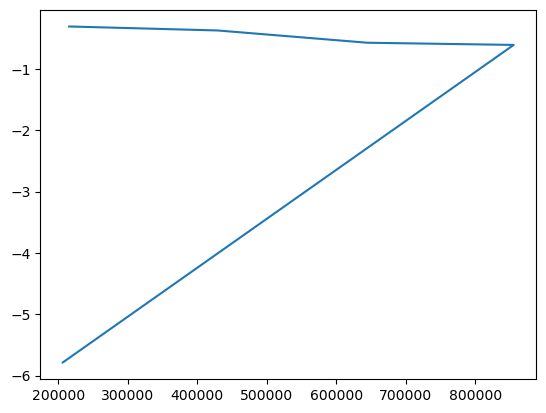

In [21]:
plt.plot(koeff['L'], koeff['k']) 

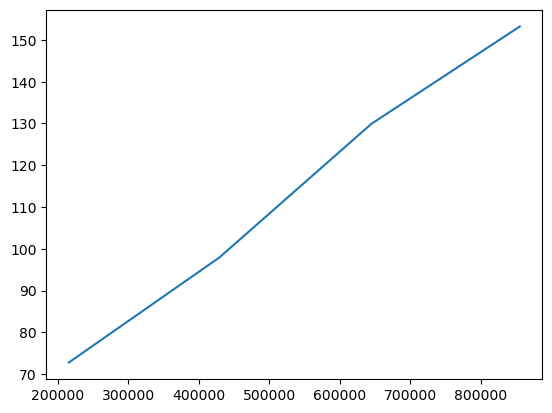

In [20]:
plt.plot(koeff['c'], koeff['b']) 

In [21]:
def mapping_1(x, a, b):
    return a * x + b 

In [22]:
def mapping_2(x, a, b, c, d):
    return a * x ** 3 + b * x ** 2 + c * x + d

In [23]:
def approx_for_a_koeff(df, mapping):
    args, _ = curve_fit(mapping, df['c'], df['a']) 
    a, b, c, d = args[0], args[1], args[2], args[3]
    y_fit = a * df['c'] ** 3 + b * df['c'] ** 2 + c * df['c'] + d
    plt.plot(df['c'], df['a'], '-', label="y - original") 
    plt.plot(df['c'], y_fit, label="y = a * x^2 + b * x + c", color='r', alpha=0.7) 
    plt.xlabel('x') 
    plt.ylabel('y') 
    plt.legend(loc = 'best', fancybox = True, shadow = True) 
    plt.grid(True) 
    plt.show() 

    return args

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


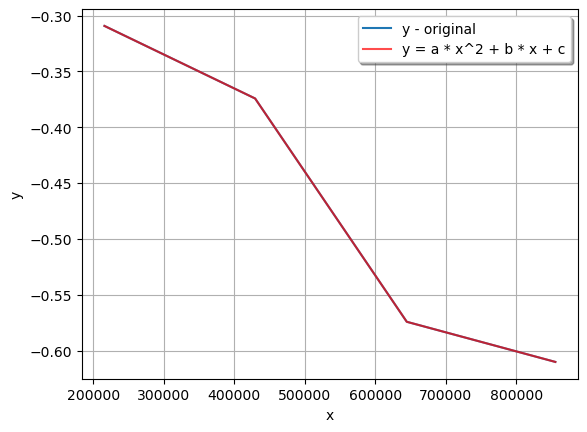

In [24]:
a = approx_for_a_koeff(koeff, mapping_2)

In [25]:
def approx_for_b_koeff(df, mapping):
    args, _ = curve_fit(mapping, df['c'], df['b']) 
    a, b = args[0], args[1]
    y_fit = a * df['c'] + b 
    plt.plot(df['c'], df['b'], '-', label="y - original") 
    plt.plot(df['c'], y_fit, label="y = a * x^2 + b * x + c", color='r', alpha=0.7) 
    plt.xlabel('x') 
    plt.ylabel('y') 
    plt.legend(loc = 'best', fancybox = True, shadow = True) 
    plt.grid(True) 
    plt.show() 

    return args

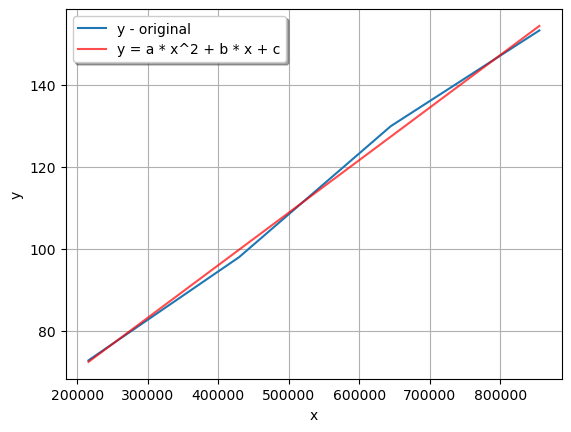

In [26]:
b = approx_for_b_koeff(koeff, mapping_1)

In [129]:
frame_1 = []

In [130]:
frame_1.append(a)

In [131]:
frame_1.append(b)

In [132]:
koeff_for_koeff = pd.DataFrame(data=frame_1)

In [133]:
koeff_for_koeff.to_excel('koeff_for_koeff_cube_inv_with_correction.xlsx')